<a href="https://colab.research.google.com/github/KJLumalang/ITBA-3206_Planeteers/blob/main/ITBA_3206_Planeteers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this analysis is to reduce greenhouse gas emissions in our world by 
reducing the emission of the transportation and electricity by generating electricity on-site using renewables and other environmentally acceptable energy sources, improving fuel efficiency with advanced design, materials, and technologies, using electric or hybrid automobiles provided that the energy is generated from lower-carbon or non-fossil fuels, generating electricity from clean and renewable sources rather than the combustion of fossil fuels and improving operating practices such as reducing engine-idling. Data sets will be used to analyze and show the increasing amount of emissions and which or what are the sources of these emissions. The data will be used to encourage some people to use electric vehicles like Hybrid electric vehicles (HEVs), plug-in hybrid electric vehicles (PHEVs) and all-electric vehicles (EVs) to reduce greenhouse gas emissions in our world.

---






# **Libraries and Data Set**

---



Importing libraries and data sets

In [499]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [500]:
pd.option_context('display.max_rows', None)
pd.option_context('display.max_columns', None)

In [501]:
df = pd.read_csv('https://raw.githubusercontent.com/KJLumalang/ITBA-3206_Planeteers/main/historical_emissions.csv')

# **Data Cleaning**

---



In [502]:
df.head(579)
display(df)

,Country,Data source,...,1991,1990
0,World,CAIT,...,23365.41,23244.24
1,World,CAIT,...,8768.70,8627.95
2,China,CAIT,...,2474.85,2360.68
3,World,CAIT,...,4764.85,4725.54
4,China,CAIT,...,798.08,728.78
...,...,...,...,...,...
574,Nepal,CAIT,...,0.03,0.00
575,Paraguay,CAIT,...,0.04,0.04
576,Eswatini,CAIT,...,0.00,0.00
577,Tuvalu,CAIT,...,0.00,0.00


Removing unecessary column

In [503]:
df = df.drop(columns = 'Data source')
df

,Country,Sector,...,1991,1990
0,World,Energy,...,23365.41,23244.24
1,World,Electricity/Heat,...,8768.70,8627.95
2,China,Energy,...,2474.85,2360.68
3,World,Transportation,...,4764.85,4725.54
4,China,Electricity/Heat,...,798.08,728.78
...,...,...,...,...,...
574,Nepal,Electricity/Heat,...,0.03,0.00
575,Paraguay,Electricity/Heat,...,0.04,0.04
576,Eswatini,Electricity/Heat,...,0.00,0.00
577,Tuvalu,Transportation,...,0.00,0.00


Finding cells with null values and replacing them with N/A

In [504]:
df.isnull().sum()

Country     0
Sector      0
Gas         0
Unit        0
2019        0
2018        0
2017        0
2016        0
2015        0
2014        0
2013        0
2012        0
2011        2
2010        2
2009        2
2008        2
2007        2
2006        2
2005        2
2004        4
2003        4
2002        4
2001        4
2000        4
1999        8
1998        8
1997        8
1996        8
1995        8
1994       10
1993       10
1992       10
1991       12
1990       15
dtype: int64

Showing rows with null value

In [505]:
nan_rows  = df.loc[df.isna().any(axis=1)]
display(nan_rows)


,Country,Sector,...,1991,1990
218,Laos,Electricity/Heat,...,NaN,NaN
310,Cambodia,Transportation,...,NaN,NaN
328,Cambodia,Electricity/Heat,...,NaN,NaN
343,Namibia,Energy,...,1.19,NaN
375,Laos,Transportation,...,NaN,NaN
393,Namibia,Transportation,...,0.49,NaN
408,Montenegro,Electricity/Heat,...,NaN,NaN
429,Suriname,Electricity/Heat,...,NaN,NaN
438,Suriname,Transportation,...,NaN,NaN
441,South Sudan,Transportation,...,NaN,NaN


Replacing null values with N/A

In [506]:
df = df.fillna('N/A')

Checking if there are no null values anymore

In [507]:
df.isnull().sum()

Country    0
Sector     0
Gas        0
Unit       0
2019       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
2000       0
1999       0
1998       0
1997       0
1996       0
1995       0
1994       0
1993       0
1992       0
1991       0
1990       0
dtype: int64

# **Visualization**

---



**Energy**

Filtering by Energy sector

In [508]:
energy_data = df.loc[df['Sector'] == 'Energy']
display(energy_data)

,Country,Sector,...,1991,1990
0,World,Energy,...,23365.41,23244.24
2,China,Energy,...,2474.85,2360.68
5,United States,Energy,...,5073.75,5112.27
6,European Union (27),Energy,...,3535.21,3569.46
7,India,Energy,...,645.15,602.05
...,...,...,...,...,...
533,Cook Islands,Energy,...,0.04,0.04
535,Kiribati,Energy,...,0.02,0.02
549,Nauru,Energy,...,0.13,0.13
563,Niue,Energy,...,0.01,0.01


Top 5 Country and Their GHG Emission by Energy Sector as year passed by

In [509]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(energy_data.loc[0:8,["Country","1990"]], )
print("2010 Emission")
display(energy_data.loc[0:8,["Country","2010"]], )
print("2019 Emission")
display(energy_data.loc[0:8,["Country","2019"]], )

1990 Emission


,Country,1990
0,World,23244.24
2,China,2360.68
5,United States,5112.27
6,European Union (27),3569.46
7,India,602.05
8,Russia,2639.05


2010 Emission


,Country,2010
0,World,34193.57
2,China,8485.09
5,United States,5700.68
6,European Union (27),3225.42
7,India,1668.13
8,Russia,2046.1


2019 Emission


,Country,2019
0,World,37636.10
2,China,10618.71
5,United States,5246.37
6,European Union (27),2731.36
7,India,2422.24
8,Russia,2208.96


Bar plot of emission 

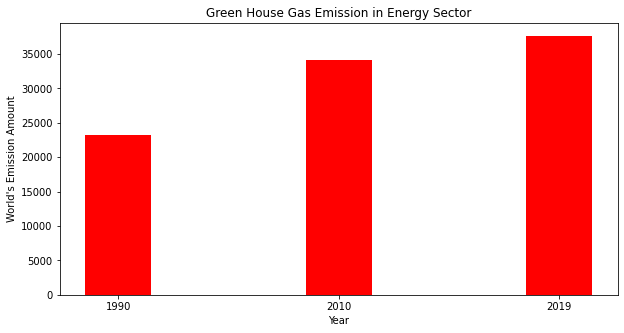

In [510]:
data = {'1990':23244, '2010':34194, '2019':37636}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='red',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Energy Sector")
plt.show()

**Electricity/Heat**

Filtering by Electricity/Heat

In [511]:
electricity_data = df.loc[df['Sector'] == 'Electricity/Heat']
display(electricity_data)

,Country,Sector,...,1991,1990
1,World,Electricity/Heat,...,8768.7,8627.95
4,China,Electricity/Heat,...,798.08,728.78
9,United States,Electricity/Heat,...,2191.74,2171.63
11,India,Electricity/Heat,...,260.14,232.96
13,European Union (27),Electricity/Heat,...,1463.74,1471.48
...,...,...,...,...,...
572,Niue,Electricity/Heat,...,0.0,0.0
574,Nepal,Electricity/Heat,...,0.03,0.0
575,Paraguay,Electricity/Heat,...,0.04,0.04
576,Eswatini,Electricity/Heat,...,0.0,0.0


Top 5 Country and their GHG emission by Electricity/Heat under Energy Sector as year passed by

In [512]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(electricity_data.loc[0:20,["Country","1990"]], )
print("2010 Emission")
display(electricity_data.loc[0:20,["Country","2010"]], )
print("2019 Emission")
display(electricity_data.loc[0:20,["Country","2019"]], )

1990 Emission


,Country,1990
1,World,8627.95
4,China,728.78
9,United States,2171.63
11,India,232.96
13,European Union (27),1471.48
15,Russia,1235.01


2010 Emission


,Country,2010
1,World,14211.19
4,China,3850.79
9,United States,2620.93
11,India,823.81
13,European Union (27),1338.38
15,Russia,958.42


2019 Emission


,Country,2019
1,World,15834.64
4,China,5616.35
9,United States,1965.56
11,India,1244.78
13,European Union (27),992.76
15,Russia,871.70


Bar plot of emission

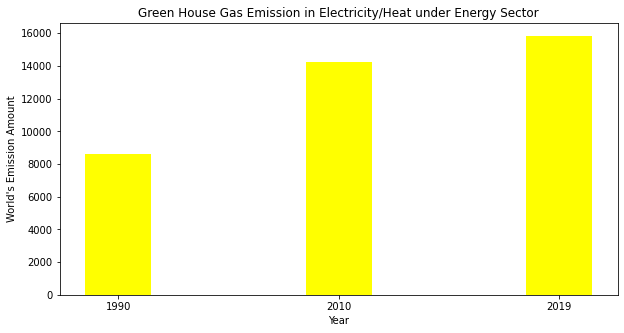

In [513]:
data = {'1990':8628, '2010':14211, '2019':15834}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='yellow',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Electricity/Heat under Energy Sector")
plt.show()

**Transportation**

Filtering by Transportation

In [514]:
transportation_data = df.loc[df['Sector'] == 'Transportation']
display(transportation_data)

,Country,Sector,...,1991,1990
3,World,Transportation,...,4764.85,4725.54
10,United States,Transportation,...,1440.67,1468.6
14,China,Transportation,...,103.06,96.28
16,European Union (27),Transportation,...,668.8,660.09
32,India,Transportation,...,68.61,66.02
...,...,...,...,...,...
556,Kiribati,Transportation,...,0.01,0.01
557,Sao Tome and Principe,Transportation,...,0.02,0.02
561,Nauru,Transportation,...,0.03,0.03
573,Niue,Transportation,...,0.0,0.0


Top 5 Country and their GHG emission by Transportation under Energy Sector as year passed by

In [515]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(transportation_data.loc[0:41,["Country","1990"]], )
print("2010 Emission")
display(transportation_data.loc[0:41,["Country","2010"]], )
print("2019 Emission")
display(transportation_data.loc[0:41,["Country","2019"]], )

1990 Emission


,Country,1990
3,World,4725.54
10,United States,1468.6
14,China,96.28
16,European Union (27),660.09
32,India,66.02
41,Russia,305.91


2010 Emission


,Country,2010
3,World,7188.99
10,United States,1733.13
14,China,584.09
16,European Union (27),814.44
32,India,197.84
41,Russia,249.18


2019 Emission


,Country,2019
3,World,8434.96
10,United States,1815.66
14,China,926.36
16,European Union (27),835.06
32,India,315.88
41,Russia,262.39


Bar plot of emission

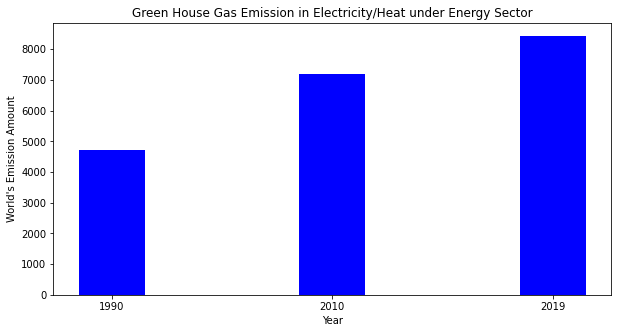

In [516]:
data = {'1990':4726, '2010':7189, '2019':8435}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='blue',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Electricity/Heat under Energy Sector")
plt.show()

Combined chart of Electricity and Transportation Emission. It shows the diffence in amount of emission.



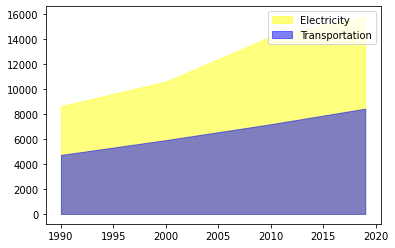

In [521]:
year = [1990, 2000,2010, 2019]

electricity =[8628, 10597, 14211,15834]

transpo =[4726, 5914, 7189,8435]

plt.fill_between(year, electricity, color="yellow",
                 alpha=0.5, label='Electricity')
plt.fill_between(year, transpo, color="blue",
                 alpha=0.5, label='Transportation')

plt.legend()
plt.show()

